In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import cross_validation

C:\Users\Himanshu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pickle
with open('mnist_small_py2_3.pkl', 'rb') as f:
    train_set = pickle.load(f)

In [3]:
data =train_set['X']
label = train_set['Y']

In [4]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
 data, label, test_size=1/7.0, random_state=0)

In [5]:
model = tree.DecisionTreeClassifier(criterion="gini", max_depth=32, max_features=784)

In [6]:
model = model.fit(train_img, train_lbl)

In [7]:
prediction = model.predict(test_img)

In [8]:
confusion = metrics.confusion_matrix(test_lbl, prediction)



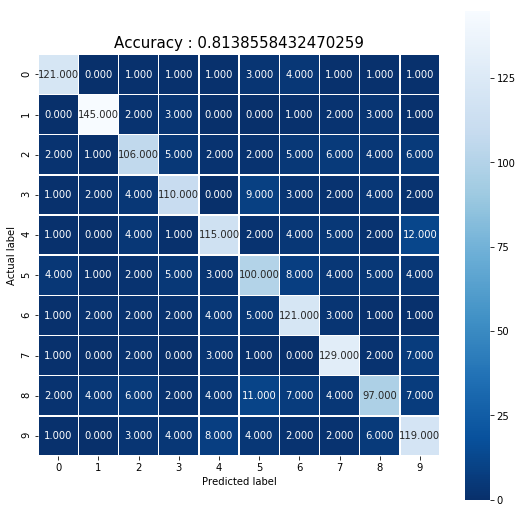

In [9]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy : {0}'.format(metrics.accuracy_score(test_lbl, prediction))
plt.title(all_sample_title, size = 15);

In [10]:
importances = model.feature_importances_
importances = importances.reshape((28, 28))

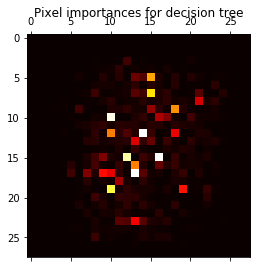

In [11]:
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances for decision tree")
plt.show()

In [12]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH